In [1]:
from fbm import FBM
from fbm import fbm, fgn, times
import numpy as np
import pandas as pd
import processi_EMGIT as em
import stochastic as st
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf,adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

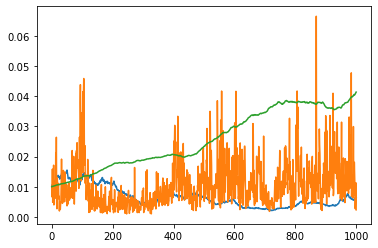

In [2]:
h1=fbm(n=1000, hurst=0.5, length=1, method='daviesharte')
h2=fbm(n=1000, hurst=0.05, length=1, method='daviesharte')
h3=fbm(n=1000, hurst=0.85, length=1, method='daviesharte')
plt.plot(np.exp(h1)/100)
plt.plot(np.exp(h2)/100)
plt.plot(np.exp(h3)/100)
plt.show()

In [3]:
N=23400
def rough(N,h,seed=457778):
    np.random.seed(seed)
    y=np.empty(N)
    s=np.empty(N)
    s[0]=100
    sigma=np.empty(N)
    sigma[0]=0.01
    dt=1/N
    cov=np.matrix([[1, -0.79],[-0.79, 1]])
    a  =np.linalg.cholesky(cov)
    h1=fbm(n=N, hurst=h, length=1, method='daviesharte')
    for i in range(1,N):
        #y[i]    = y[i-1] -1*y[i-1]*dt+ 1*np.sqrt(dt)*h1[i-1]
        sigma[i]= np.exp(h1[i])/100#'''*a[1, 0]+h1[i] * a[1, 1 ]''')/100
        s[i]    = s[i-1]+s[i-1]*sigma[i]*np.sqrt(dt)*(np.random.randn()*a[0,0])
    return[s,sigma]


In [4]:
s=rough(23400,0.05)
r2=em.calcolaRendimenti(s[0],len(s[0]))
f=em.realVol(r2,10,23400)


<Figure size 1440x720 with 0 Axes>

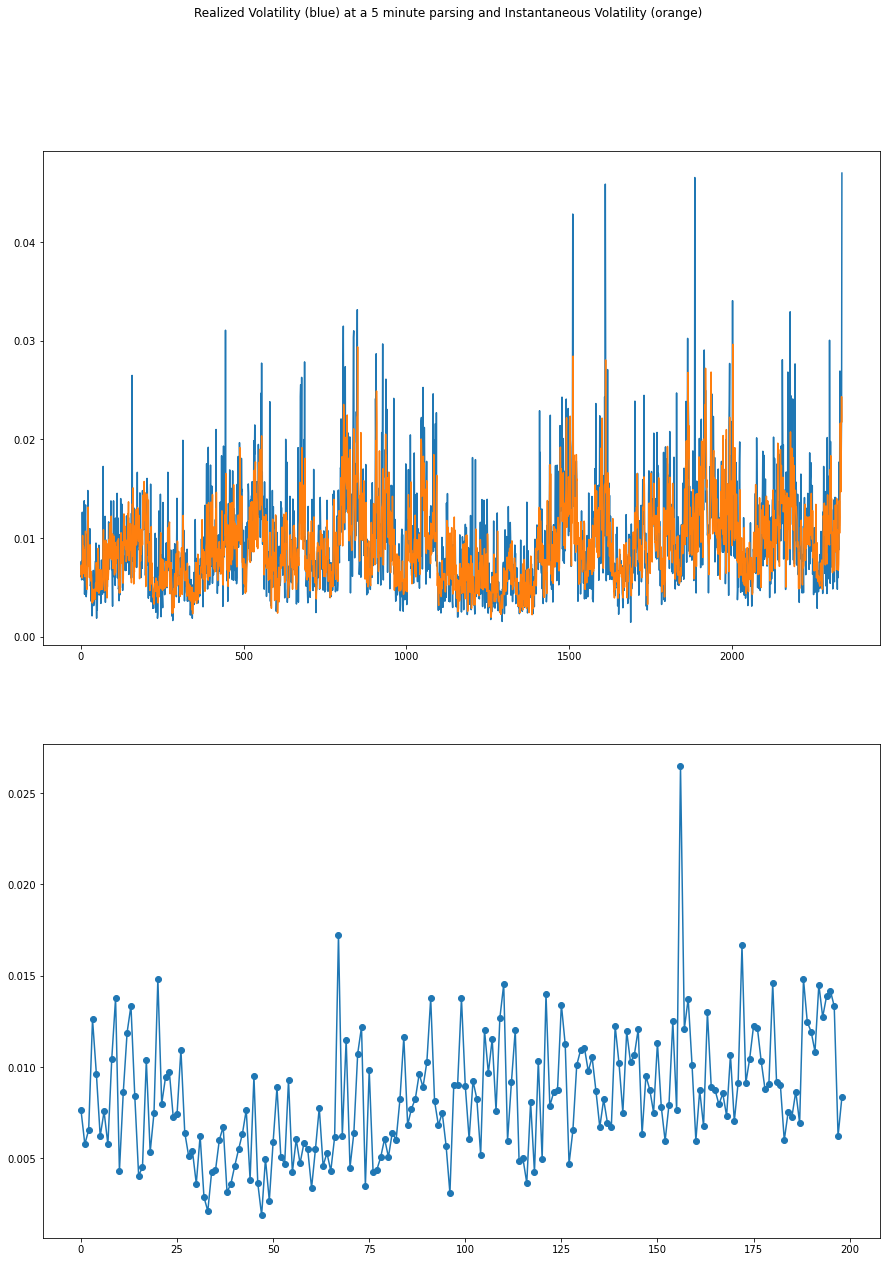

In [5]:

xx=[x for x in range(len(f))]
z=s[1].reshape(-1,10).mean(axis=1)

plt.figure(figsize=(20, 10))
fig, axs = plt.subplots(2,figsize=(15,20))
fig.suptitle('Realized Volatility (blue) at a 5 minute parsing and Instantaneous Volatility (orange)')
#fig.inftitle("Differences: RV-sigma")

axs[0].plot(xx, f,xx, z[:-1])
axs[1].plot( f[1:200],'-o')
plt.show()